In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt


## Initialization

In [2]:
# num harmonics
n = 3
# max frequency
w_max = 1800
# num model steps
N = 256


In [3]:
%%time

w_step = w_max / n
w = [i * w_step for i in range(1, n + 1)]
w = np.array(w)
w.resize((n, 1))
print("Frequencies: \n", w)


Frequencies: 
 [[ 600.]
 [1200.]
 [1800.]]
Wall time: 995 µs


## Calculations 

In [4]:
%time

# generate amplitudes and phases
amplitudes = np.random.random((n, 1))
phases = np.random.randint(-10, 10, size=(n, 1))
harmonics = [np.linspace(0, N, num=N) for i in range(n)]
harmonics = np.array(harmonics)

harmonics = amplitudes * np.sin(w * harmonics + phases)
result_signal = harmonics.sum(axis=0, keepdims=False)

print(result_signal.shape)
print("Amplitudes :\n", amplitudes)
print("Phases :\n", phases)


Wall time: 0 ns
(256,)
Amplitudes :
 [[0.80120631]
 [0.93373877]
 [0.33232894]]
Phases :
 [[-4]
 [-9]
 [-1]]


In [5]:
%%time

mean = result_signal.mean()
print(mean)

0.001005171251758588
Wall time: 998 µs


In [6]:
%%time

dispersion = result_signal.std() ** 2
print(dispersion)

0.8132289000643436
Wall time: 995 µs


## Graphs

In [7]:
# Additional task
# colours from harmonics
max_vals = harmonics.max(axis=1, keepdims=True)
min_vals = harmonics.min(axis=1, keepdims=True)
# normalization [0, 1]
harmonics_norm = (harmonics - min_vals) / (max_vals - min_vals)
colours = harmonics_norm.mean(axis=1)
colours

array([0.49973999, 0.50106991, 0.49904769])

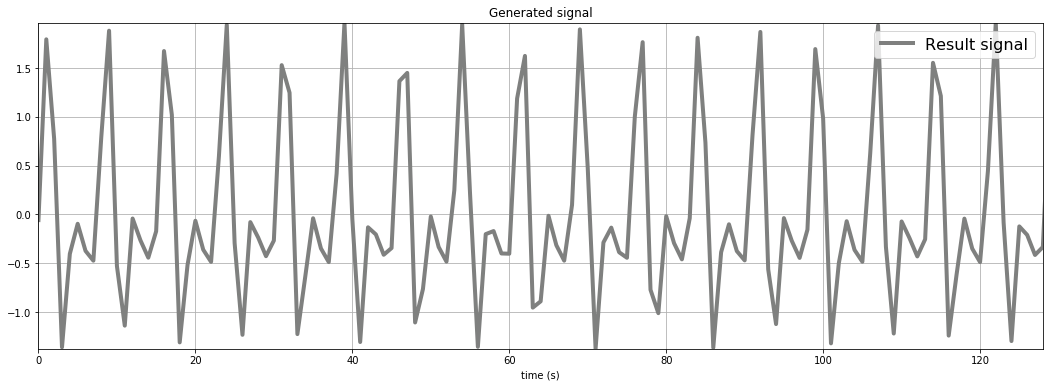

In [8]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.set(title="Generated signal", xlabel="time (s)")
ax.plot(result_signal, color=(colours), linewidth=4)
ax.legend(["Result signal"], fontsize=16, loc=0)
ax.grid()
ax.set(xlim=[0, N/2], ylim=[result_signal.min(), result_signal.max()])
#ax.tick_params(axis='x', direction='inout', length=50)

#ax.plot(harmonics[0], color="green", ls='--', linewidth=2)
#ax.plot(harmonics[1], color="blue", ls='-.', linewidth=2)
#ax.plot(harmonics[2], color="brown", ls=':', linewidth=2)
#ax.plot(harmonics[3], color="green", ls='--', linewidth=1)
#ax.plot(harmonics[4], color="green", ls='--', linewidth=1)
#ax.plot(harmonics[5], color="green", ls='--', linewidth=1)

plt.show()

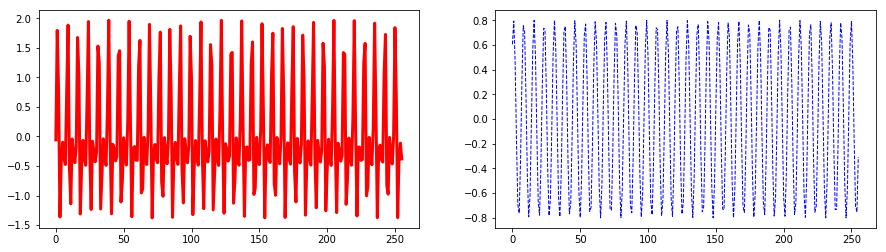

In [9]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(121)
ax.plot(result_signal, color="red", linewidth=3,)
ax2 = fig.add_subplot(122)
ax2.plot(harmonics[0], color="blue", ls='--', linewidth=1)

plt.show()